# More With `matplotlib`

<a href="http://creativecommons.org/licenses/by-nc/4.0/" rel="license"><img style="border-width: 0;" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" alt="Creative Commons License" /></a>
This tutorial is licensed under a <a href="http://creativecommons.org/licenses/by-nc/4.0/" rel="license">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

## Lab Goals

This lab covers how to generate `matplotlib` plots for data stored in a `pandas` `DataFrame`. It provides an overview of how to generate a variety of common plot types, including line plots, bar charts, histograms, bax plots, area plots, scatter plots, and pie charts. It also covers how `pandas`'s plotting function handles missing data. It provides a comparison of the `matplotlib` and `seaborn` plotting packages and provides an introduction to `seaborn` with sample code. 

By the end of this lab, students will be able to:
- Understand how to generate `matplotlib` plots for data stored in a `pandas` `DataFrame`, for a variety of plot types
- Understand how to navigate the `pandas` documentation to troubleshoot and further explore `pandas`'s plotting functions
- Understand the basic distinctions and relationship between `matplotlib` and `seaborn`

[Click here](https://raw.githubusercontent.com/kwaldenphd/more-with-matplotlib/main/more-with-matplotlib.ipynb) and select the "Save As" option to download this lab as as Jupyter Notebook.

## Acknowledgements

The author consulted the following resources when writing  this tutorial:
- Chapter 4.14 "Visualization With Seaborn" from Jake VanderPlas, [*Python Data Science Handbook: Essential Tools for Working with Data*](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html ) (O'Reilly, 2016)
- `pandas`, [User Guide, "Visualization"](https://pandas.pydata.org/docs/user_guide/visualization.html)
- `pandas`, [Getting Started, "Plotting"](https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html)
- Chapter 9 "Plotting and Visualization" from Wes McKinney, [*Python for Data Analysis: Data Wrangling With pandas, Numpy, and IPython*](https://www.oreilly.com/library/view/python-for-data/9781491957653/) (O'Reilly, 2017)
- Chapter 15 "Generating Data" from Eric Matthes, [*Python Crash Course: A Hands-On, Project-Based Introduction to Programming*](https://ehmatthes.github.io/pcc/) (No Starch Press, 2019).
- [`seaborn` package documentation](https://seaborn.pydata.org/introduction.html)

# Table of Contents

- [`pandas` and `matplotlib`](#pandas-and-matplotlib)
  * [Plotting in `pandas`Uusing `.plot()`](#plotting-in-pandas-using-plot)
    * [Time Series Data and Line Plots](#time-series-data-and-line-plots)
    * [Bar Charts](#bar-charts)
      * [Grouped Bar Charts](#grouped-bar-charts)
      * [Stacked Bar Charts](#stacked-bar-charts)
      * [Horizontal Bar Charts](#horizontal-bar-charts)
    * [Histograms](#histograms)
    * [Box Plots](#box-plots)
    * [Area Plots](#area-plots)
    * [Scatter Plots](#scatter-plots)
    * [Pie Charts](#pie-charts)
  * [`.plot()` and Missing Data](#plot-and-missing-data)
- [Working with `pandas` and `seaborn`](#working-with-pandas-and-seaborn)
- [Project Prompts](#project-prompts)
- [Lab Notebook Questions](#lab-notebook-questions)

# `pandas` and `matplotlib`

1. Having to load data manually to build a visualization or plot gets cumbersome quickly.

2. In many situations, we might want to work with data in a `pandas` `DataFrame` when building a visualization.

3. `pandas` includes a `.plot()` attribute that interacts with the `matplotlib` API to generate plots.

4. The `pandas` `.plot()` attribute relies on the `matplotlib` API to generate plots, so our work with `matplotlib` will come in handy when we need to customize plots generated using `.plot()`.

5. And in many cases, the `.plot()` syntax is similar to `matplotlib` `OO` syntax.

## Plotting in `pandas` Using `.plot()`

6. Let's go back to the air quality data we were working with previously in `pandas`.

7. To load the data as a dataframe:

In [2]:
# import pandas
import pandas as pd

# load data from url to dataframe
air_quality = pd.read_csv('https://raw.githubusercontent.com/kwaldenphd/more-with-matplotlib/main/air_quality_no2.csv', index_col=0, parse_dates=True)

# check data has loaded
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


8. We can do a quick visual check of the data by passing the entire data frame to `.plot()`.

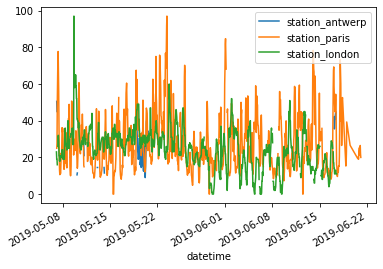

In [13]:
# import matplotlib
import matplotlib.pyplot as plt

# generate plot
air_quality.plot()

# show plot
plt.show()

9. This isn't a particularly meaningful visualization, but it shows us how the default for `.plot()` creates a line for each column with numeric data.

10. The index is used for the `X` axis, and all numeric columns are plotted on the `Y` axis.

11. We can also see that `.plot()` pulls tick marks, tick labels, and axis titles from the underlying `dataframe`.

12. Let's say we only wanted to plot Paris data.

13. We can select that column in the `dataframe` before calling `.plot()`.

<AxesSubplot:xlabel='datetime'>

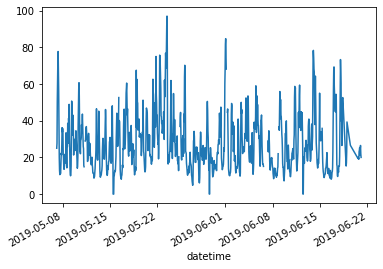

In [4]:
air_quality["station_paris"].plot()

14. We can plot a specific column in the `dataframe` using the `[" "]` selection method.

15. Let's say we want to visually compare NO<sub>2</sub> values measured in London and Paris.

16. We need to specify what column is going to be used for the `X` axis as well as what column is going to be used for the `Y` axis.

17. For this example, a scatterplot will be more effective than a lineplot.

18. We can create a scatterplot using `.plot.scatter()`.

<AxesSubplot:xlabel='station_london', ylabel='station_paris'>

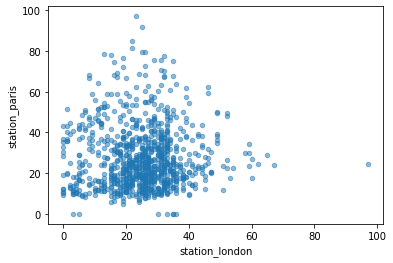

In [7]:
air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.5)

19. This example generates a scatterplot with London data on the `X` axis and Paris data on the `Y` axis.

20. While the default for `.plot()` is a lineplot, there are a number of other methods we can use with `.plot()`.

21. Again, you will see some overlap with `matplotlib` syntax.

22. We can use these strings as as method in combination with `.plot()` or we can pass them to `.plot()` as a `kind` parameter.

<table>
    <tr>
        <td>Plot Type</td>
        <td>Method Syntax</td>
        <td>Parameter Syntax</td>
    </tr>
    <tr>
        <td>Default (line)</td>
        <td>`.plot()`</td>
        <td>NA</td>
    </tr>
    <tr>
        <td>Area</td>
        <td>`.plot.area()`</td>
        <td>`.plot(kind='area')`</td>
    </tr>
    <tr>
        <td>Bar</td>
        <td>`.plot.bar()`</td>
        <td>`.plot(kind='bar')`</td>
    </tr>
    <tr>
        <td>Horizontal bar</td>
        <td>`.plot.barh()`</td>
        <td>`.plot(kind='barh')`</td>
    </tr>
    <tr>
        <td>Box</td>
        <td>`.plot.box()`</td>
        <td>`.plot(kind='box')`</td>
    </tr>
    <tr>
        <td>Density</td>
        <td>`.plot.density()`</td>
        <td>`.plot(kind='density')`</td>
    </tr>
    <tr>
        <td>Hexbin</td>
        <td>`.plot.hexbin()`</td>
        <td>`.plot(kind='hexbin')`</td>
    </tr>
    <tr>
        <td>Histogram</td>
        <td>`.plot.hist()`</td>
        <td>`.plot(kind='hist')`</td>
    </tr>
    <tr>
        <td>Kernel density</td>
        <td>`.plot.kde()`</td>
        <td>`.plot(kind='hist')`</td>
    </tr>
    <tr>
        <td>Line</td>
        <td>`.plot.line()`</td>
        <td>`.plot(kind='line')` *this would be redundant since the default for `.plot()` is line*</td>
    </tr>
    <tr>
        <td>Pie</td>
        <td>`.plot.pie()`</td>
        <td>`.plot(kind='pie')`</td>
    </tr>
    <tr>
        <td>Scatter</td>
        <td>`.plot.scatter()`</td>
        <td>`.plot(kind='scatter')`</td>
    </tr>
</table>

23. In general, it's more effective to use the method syntax to note plot type, rather than treating plot type as a parameter.

24. Let's create a box plot using our air quality data.

<AxesSubplot:>

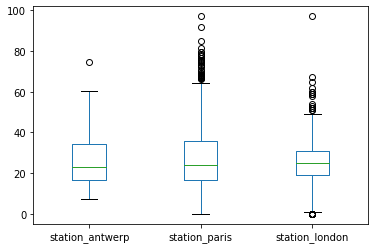

In [8]:
air_quality.plot.box()

25. We can see each numeric column (each station) has its own box in the default boxplot.

26. Let's say we wanted to generate a lineplot with separate subplots for each of the numeric columns.

27. We can accomplish this by setting the `subplots` parameter to `True`.

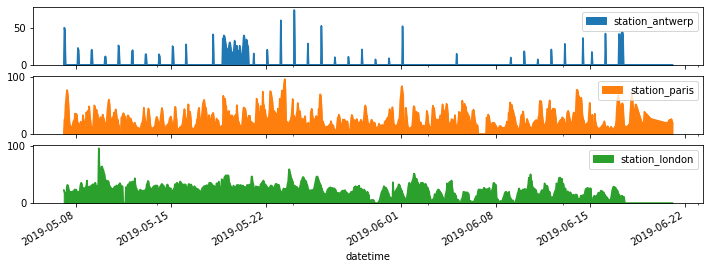

In [11]:
axs = air_quality.plot.area(figsize=(12, 4), subplots=True)

28. Let's say we want to further customize this plot.

29. This is where we start to see more `matplotlib` syntax in play.

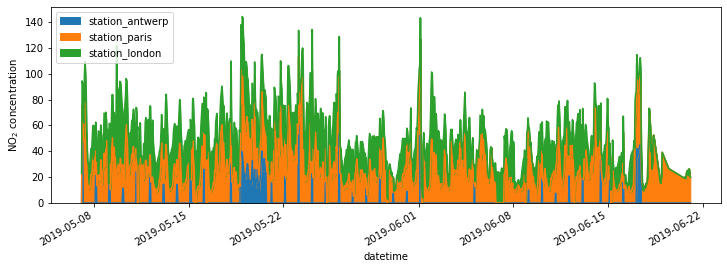

In [14]:
# create figure and axes
fig, axs = plt.subplots(figsize=(12, 4))

# build area plot
air_quality.plot.area(ax=axs)

# set y axis label
axs.set_ylabel("NO$_2$ concentration")

# save plot as png file
fig.savefig("no2_concentrations.png")

30. Each plot object created by `pandas` is also a `matplotlib` object.

31. Having a deep knowledge of `matplotlib` allows you to customize plots generated using `pandas` `.plot()` function.

32. That said, there are some parameters you can set as part of `.plot()` without having to have separate `matplotlib` syntax commands.

33. The plot `kind` is one parameter option, as is the `dataframe`, `X` axis data, and `Y` axis data.

34. Other parameters:

<table>
    <tr>
        <td>Parameter</td>
        <td>Explanation</td>
    </tr>
    <tr>
        <td>`ax`</td>
        <td>`matplotlib` `axes` object; axes for the current figure</td>
    </tr>
    <tr>
        <td>`subplots`</td>
        <td>Default is `False`; set to `True` to enable multiple plots in the same figure</td>
    </tr>
    <tr>
        <td>`layout`</td>
        <td>Follows `(rows, columns)` syntax to set subplot layout</td>
    </tr>
    <tr>
        <td>`figsize`</td>
        <td>Follows `(width, height)` syntax; Sets figure object width and height in inches</td>
    </tr>
    <tr>
        <td>`use_Index`</td>
        <td>Default is `True`; uses dataframe index as ticks for `X` axis</td>
    </tr>
    <tr>
        <td>`title`</td>
        <td>Title to use for the plot; can take a list with titles for corresponding subplots</td>
    </tr>
    <tr>
        <td>`grid`</td>
        <td>Default is `False`; set to `True` to show axis grid lines</td>
    </tr>
    <tr>
        <td>`legend`</td>
        <td>Places legend on axis subplot</td>
    </tr>
    <tr>
        <td>`xticks`</td>
        <td>Values to use for `X` axis ticks</td>
    </tr>
    <tr>
        <td>`yticks`</td>
        <td>Values to use for `Y` axis ticks</td>
    </tr>
    <tr>
        <td>`xlim`</td>
        <td>Follows `(lower limit, upper limit)` syntax; Sets `X` axis limits</td>
    </tr>
    <tr>
        <td>`ylim`</td>
        <td>Follows `(lower limit, upper limit)` syntax; Sets `Y` axis limits</td>
    </tr>
    <tr>
        <td>`xlabel`</td>
        <td>Label for `X` axis; default uses index column name</td>
    </tr>
    <tr>
        <td>`ylabel`</td>
        <td>Label for `Y` axis; default uses `Y` column name</td>
    </tr>
    <tr>
        <td>`fontsize`</td>
        <td>Sets font size for tickmarks</td>
    </tr>
    <tr>
        <td>`colormap`</td>
        <td>Sets `matplotlib` colormap to select colors from</td>
    </tr>
    <tr>
        <td>`table`</td>
        <td>Default is `False`; set to `True` to draw a table from data in the `DataFrame`</td>
    </tr>
    <tr>
        <td>`stacked`</td>
        <td>Default is `False` in line and bar plots, `True` in area plot; if `True`, creates stacked plot</td>
    </tr>
</table>

35. For more parameters that can be passed to `.plot()`: [`pandas.DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

36. Let's walk through a few more examples of using `.plot()` with a `pandas` `DataFrame`.

37. NOTE: The `.plot()` method can be used on `pandas` `Series` and `DataFrame`. These examples focus on `DataFrame`s.

### Time Series Data and Line Plots

38. Let's generate some random time series data.

<AxesSubplot:>

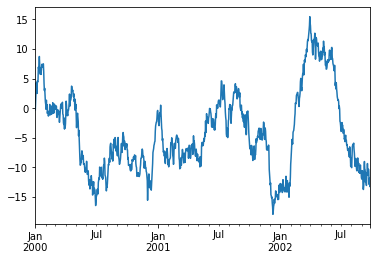

In [15]:
# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import numpy
import numpy as np

# create series with random numbers organized over time series
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

# cumulative sum calculated by iterating over Series
ts = ts.cumsum()

# generate line plot
ts.plot()

39. In this example, our `Series` index labels are specified using `pd.date_range()`.

40. These are the `X` axis values.

41. The index values are the 1000 random values generated by `np.random.randn()`.

42. We use the cumulative sum `.cumsum` to determine the total value for each unique time in the series.

43. Let's modify this example to use a `DataFrame`.

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

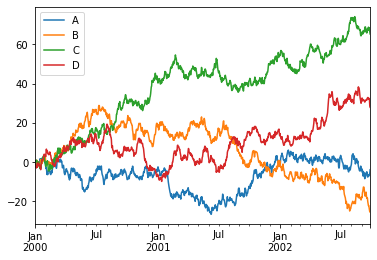

In [16]:
# create new dataframe with random numbers, the original time series index, and four columns
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))

# calculate cumulative sum
df = df.cumsum()

# create figure
plt.figure()

# create plot
df.plot()

44. For more on line plots:
- [`pandas`, "Basic plotting"](https://pandas.pydata.org/docs/user_guide/visualization.html#basic-plotting-plot)
- [`pandas.DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
- [`pandas.DataFrame.plot.line`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html)

### Bar Charts

45. Let's say we want to create a bar chart with a single line of data from our `df` `DataFrame`.

46. We can select a specific row using `iloc`.

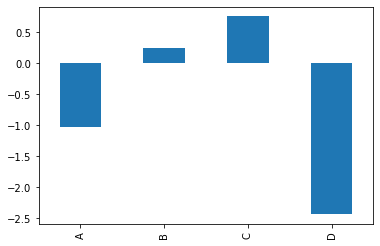

In [17]:
# create figure
plt.figure()

# create bar plot for single row of data
df.iloc[5].plot.bar()

# show plot
plt.show()

#### Grouped Bar Charts

47. Let's say we want to produce a grouped bar chart.

48. We can create a `DataFrame` with four columns and random values.

<AxesSubplot:>

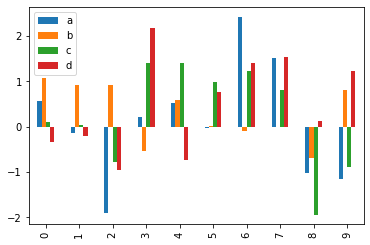

In [18]:
# create dataframe
df2 = pd.DataFrame(np.random.randn(10, 4), columns=['a', 'b', 'c', 'd'])

# generate bar chart
df2.plot.bar()


49. By default, `.plot.bar()` creates a separate bar for each of the numeric columns.

50. We could select a single column using `['']` to only show one bar or column value.

#### Stacked Bar Charts

51. If we wanted to show this data as a stacked bar chart, we would set the `stacked` parameter to `True`.

<AxesSubplot:>

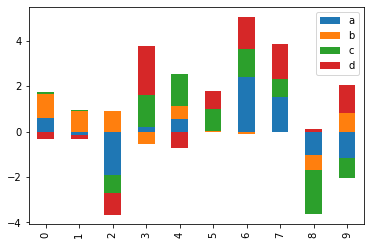

In [19]:
df2.plot.bar(stacked=True)

#### Horizontal Bar Charts

52. Remember `.plot.barh()` generates a horizontal bar chart, and we can also set `stacked` to `True` here to create a horizontal stacked bar chart.

<AxesSubplot:>

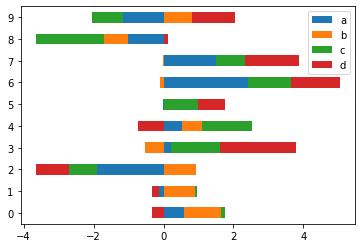

In [20]:
df2.plot.barh(stacked=True)

53. For more on bar charts:
- [`pandas`, "Bar plots"](https://pandas.pydata.org/docs/user_guide/visualization.html#bar-plots)
- [`pandas.DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
- [`pandas.DataFrame.plot.bar`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)
- [`pandas.DataFrame.plot.barh`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html)

### Histograms

54. The `.plot.hist()` method will generate a histogram.

55. We can also use `.hist()` to generate a histogram.

<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

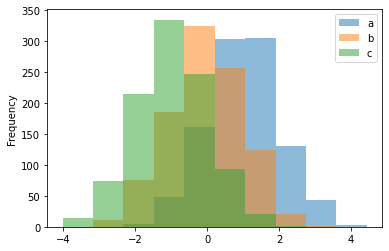

In [21]:
# create dataframe with three columns using dictionary with random number data
df4 = pd.DataFrame({"a": np.random.randn(1000) + 1, "b": np.random.randn(1000), "c": np.random.randn(1000) - 1,}, columns=["a", "b", "c"],)

# create figure object
plt.figure()

# create histogram
df4.plot.hist(alpha=0.5)

56. We can set `stacked` to `True` to create a stacked histogram.

array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'c'}>, <AxesSubplot:>]], dtype=object)

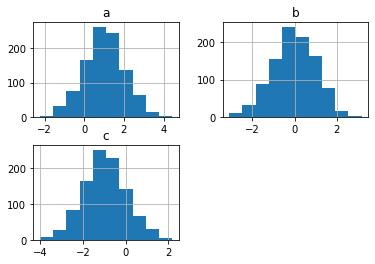

In [22]:
df4.hist(stacked=True)

57. We can also specify the bin size using the `bins` keyword.

<AxesSubplot:ylabel='Frequency'>

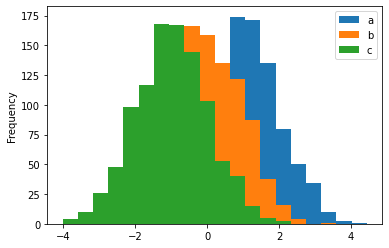

In [23]:
df4.plot.hist(bins=20)

58. We can use the `.hist()` method in `matplotlib` to further customize our histogram: [`matplotlib.axes.Axes.hist`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib.axes.Axes.hist)

59. For more on histograms:
- [`pandas`, "Visualization, Histograms"](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization-hist)
- [`pandas.DataFrame.plot.hist`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html)
- [`pandas.DataFrame.hist`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

### Box plots

60. We can generate box plots using `.plot.box()` or `.boxplot()`.

61. The default settings visualize the distribution of values within each column.

62. Back to our random number `DataFrame`, this time with five columns.

<AxesSubplot:>

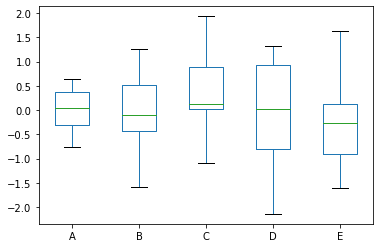

In [24]:
# create dataframe
df = pd.DataFrame(np.random.randn(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

# create plot
df.plot.box()

63. We can add colors to our box plot using the `color` keyword.

<AxesSubplot:>

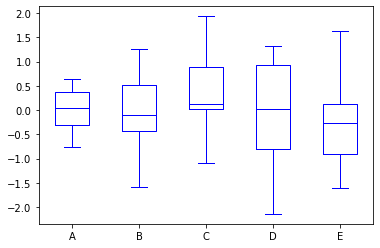

In [26]:
df.plot.box(color='blue')

64. We can also use a dictionary with key-value pairs for each component of our box plot.

<AxesSubplot:>

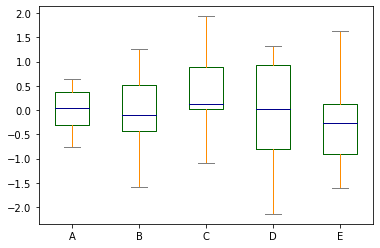

In [25]:
# set color dictionary
color = {"boxes": "DarkGreen", "whiskers": "DarkOrange", "medians": "DarkBlue", "caps": "Gray",}

# draw plot and specify colors and outlier symbol using keyword argument or kwarg
df.plot.box(color=color, sym="r+")

65. For more on box plots:
- [`pandas`, "Visualization, Box plots"](https://pandas.pydata.org/docs/user_guide/visualization.html#box-plots)
- [`pandas.DataFrame.plot.box`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html)
- [`pandas.DataFrame.boxplot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html)

### Area Plots

66. Basic syntax:

<AxesSubplot:>

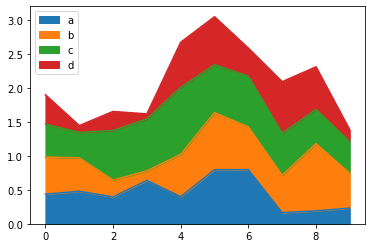

In [27]:
df = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])

df.plot.area()

67. For more on area plots:
- [`pandas`, "Visualization, Area plot"](https://pandas.pydata.org/docs/user_guide/visualization.html#area-plot)
- [`pandas.DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
- [`pandas.DataFrame.plot.area`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.area.html)

### Scatter Plots

68. Basic syntax:

<AxesSubplot:xlabel='a', ylabel='b'>

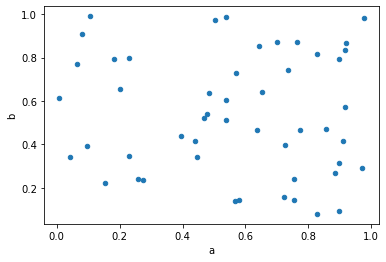

In [28]:
df = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])

df.plot.scatter(x="a", y="b")

69. For more on scatter plots:
- [`pandas`, "Visualization, Scatter plot"](https://pandas.pydata.org/docs/user_guide/visualization.html#scatter-plot)
- [`pandas.DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
- [`pandas.DataFrame.plot.scatter`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)

### Pie Charts

70. Basic syntax:

<AxesSubplot:ylabel='series'>

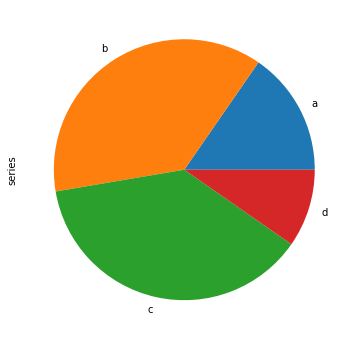

In [29]:
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")

series.plot.pie(figsize=(6, 6))

71. For more on pie plots:
- [`pandas`, "Visualization, Pie Plot"](https://pandas.pydata.org/docs/user_guide/visualization.html#pie-plot)
- [`pandas.DataFrame.plot.pie`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html#pandas.DataFrame.plot.pie)

<blockquote>Q1: Build at least three different types of plots using matplotlib and data stored in a Pandas DataFrame. Include code + comments.
 
Each plot should include the following elements:
 <ul>
  <li>Title</li>
  <li>Axis labels</li>
  <li>Legend</li>
  <li>Scale or tickmarks</li>
  <li>Data source</li>
 </ul>
 
Plot types to choose from:
 <ul>
 <li>Line plots</li>
 <li>Bar chart</li>
 <li>Grouped bar chart</li>
 <li>Horizontal bar chart</li>
 <li>Stacked bar chart</li>
 <li>Histogram</li>
 <li>Box plot</li>
 <li>Area plot</li>
 <li>Scatter plot</li>
 <li>Pie chart</li>
 </ul>
 </blockquote>

## `.plot()` and Missing Data

72. Just like `pandas` has built-in settings for handling missing data or `NaN` values, the `.plot()` method also has default settings for how each type of plot handles missing data.

<table>
    <tr>
        <td>Plot Type</td>
        <td>NaN Handling</td>
    </tr>
    <tr>
        <td>Line</td>
        <td>Leaves gaps</td>
    </tr>
    <tr>
        <td>Stacked line</td>
        <td>Fills 0s</td>
    </tr>
    <tr>
        <td>Bar</td>
        <td>Fills 0s</td>
    </tr>
    <tr>
        <td>Scatter</td>
        <td>Drops missing values</td>
    </tr>
    <tr>
        <td>Histogram</td>
        <td>Drops missing values (column-wise)</td>
    </tr>
    <tr>
        <td>Box</td>
        <td>Drops missing values (column-wise)</td>
    </tr>
    <tr>
        <td>Area</td>
        <td>Fills 0s</td>
    </tr>
    <tr>
        <td>Kernel density (KDE)</td>
        <td>Drops missing values (column-wise)</td>
    </tr>
    <tr>
        <td>Hexbin</td>
        <td>Drops missing values</td>
    </tr>
    <tr>
        <td>Pie</td>
        <td>Fills 0s</td>
    </tr>
</table>

73. To customize or alter these default settings, you would use `.fillna()` or `.dropna()` to filter the `DataFrame` before generating the plot.

## Additional Resources

74. For more on plotting with `pandas` and `matplotlib`:
- [`pandas`, Tutorials, "Plotting"](https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html)
- [`pandas`, "Plotting tools"](https://pandas.pydata.org/docs/user_guide/visualization.html#plotting-tools)
- [`pandas`, "Plot formatting"](https://pandas.pydata.org/docs/user_guide/visualization.html#plot-formatting)
- [`pandas`, "Plotting directly with matplotlib"](https://pandas.pydata.org/docs/user_guide/visualization.html#plotting-directly-with-matplotlib)

# Working with `pandas` and `seaborn`

75. As we've covered previously, `matplotlib` gives you a wide range of base components to work with when generating plots.

76. But, `matplotlib` does have limitations, and building a plot from the ground up, specifying each component can be cumbersome (and result in significant boilerplate code).

77. Advanced statistical analysis with `matplotlib` is possible, but cumbersome.

78. If you need to engage in advanced statistical analysis beyond what is easily accessible in `matplotlib`, `seaborn` is a statistical data visualization library that works well with `pandas`.

79. "`seaborn` is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics" (["Seaborn"](https://seaborn.pydata.org/).

80. `seaborn` works with `numpy`, `scipy`, `pandas`, and `matplotlib` to simply high-level functions for common statistical plots.

81. Let's compare `seaborn` and `matplotlib` using random walk data and a line plot.

82. Sample line plot generated using only `matplotlib`:

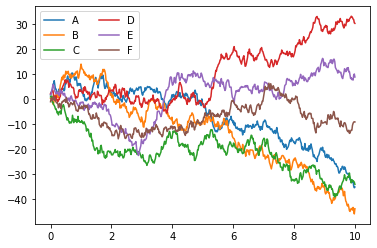

In [30]:
# import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# create random walk data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

# create figure
fig, ax = plt.subplots()

# generate line plot
ax.plot(x, y)

# create legend
ax.legend('ABCDEF', ncol=2, loc='upper left')

# show plot
plt.show()

83. An okay plot, but not particularly effective for this data.

84. Let's generate the same plot with `seaborn` running on top of `matplotlib`.

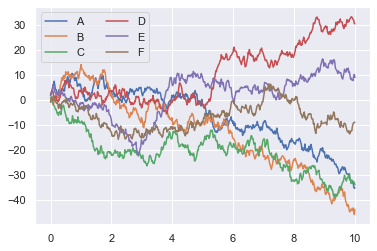

In [31]:
# import seaborn package
import seaborn as sns

# set seaborn  style
sns.set()

# create figure
fig, ax = plt.subplots()

# generate line plot
ax.plot(x, y)

# create legend
ax.legend('ABCDEF', ncol=2, loc='upper left')

# show plot
plt.show()

85. A simple way to incorporate `seaborn` with `matplotlib` is to use `seaborn`'s plot styling.

86. `matplotlib` also has a few different style sheets based on `seaborn`.

87. Let's look at a couple more sophisticated statistical plots built using `seaborn`.

88. We can create a plot that highlights the relationship between resturaunt bill amount, tip, and meal time.

89. This data comes from the `tips` example dataset already packaged in `seaborn`.

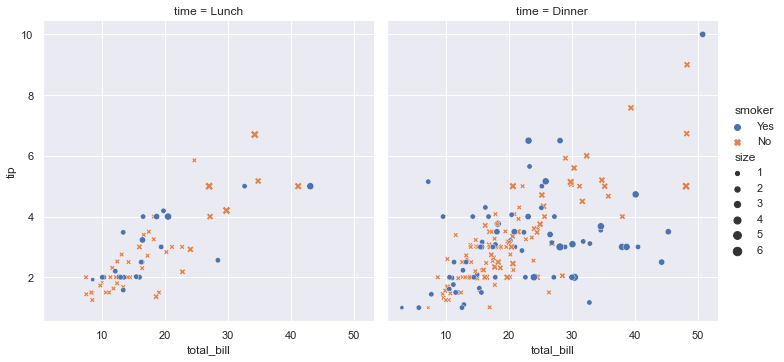

In [33]:
# import seaborn
import seaborn as sns

# apply default seaborn theme
sns.set_theme()

# load dataset already stored as dataframe
tips = sns.load_dataset("tips")

# tips

# create plot
sns.relplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker", style="smoker", size="size",)

90. `seaborn` draws on `matplotlib`, but we don't need to directly load or import `matplotlib`.

91. We load the `tips` dataset as a `DataFrame`.

92. We then create a visualization that shows the relationships between the five dataset variables through the single call to the `.relplot()` function.

93. We can start to think through all of the work happening behind the scenes in `matplotlib` to generate this visualization:
- create figure/axes object with a 2, 1 subplot grid
- create subplots
- set tick values and labels for each axis for both subplots
- set axis labels and plot titles for both subplots
- set plot type for each subplot
- set symbol types, color, and size for each type of datapoint, for each subplot
- generate legend

94. And the list goes on.

95. `seaborn` handles all of those translations from the dataframe to `matplotlib` arguments.

96. This simplifies the work of writing code to generate this plot.

97. `seaborn`'s `.relplot()` function is designed to visualize statistical relationships.

98. Sometimes scatterplots are the most effective way to show these relationships.

99. But, in a relationship where one variable is a measure of time, a line can be a more effective representation.

100. We can use the `kind` parameter with the `.relplot()` function to make this change.

101. An example of `.relplot()` using a different sample dataset.

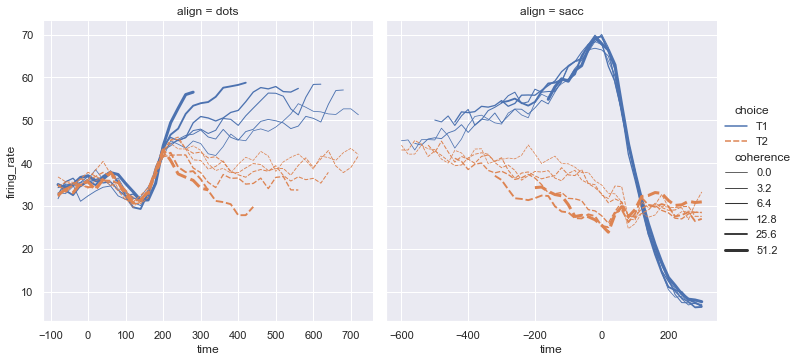

In [36]:
# load sample dataset as dataframe
dots = sns.load_dataset('dots')

# dots

# creat line plot showing relationships
sns.relplot(data=dots, kind="line", x="time", y="firing_rate", 
            col="align", hue="choice", size="coherence", 
            style="choice", facet_kws=dict(sharex=False),)

102. In this example, the `style` parameter impacted line weight and style, rather than marker size as it did in the previous example.

103. A few other `seaborn` examples.

104. Relationship plot that presents average of one variable as a function of other variables.

In [37]:
fmri = sns.load_dataset("fmri")

fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


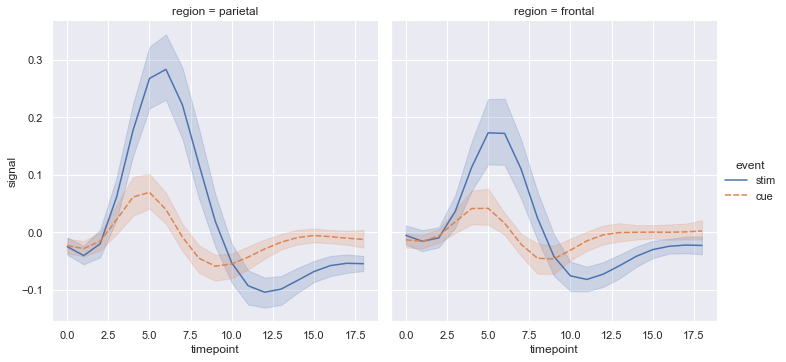

In [38]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

105. `seaborn` estimates the statistical values using bootstrapping to compute confidence intervals and draw error bars to show uncertainty.

106. We could go back to our bill and tip data to generate a scatterplot that includes a linear regression model.

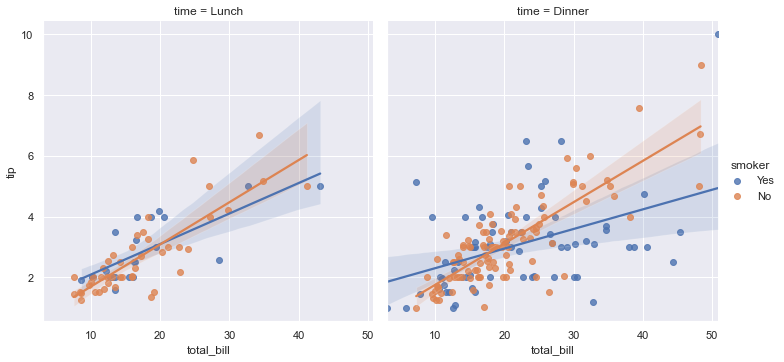

In [39]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

107. We can visualize variable distribution with kernel density estimation.

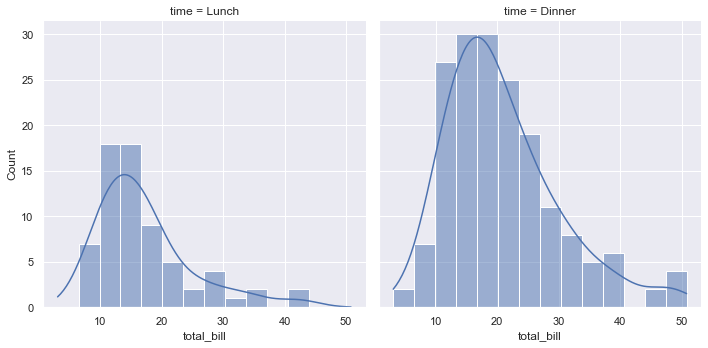

In [40]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

108. `seaborn` can also calculate and plot the empirical cumulative distribution function (`ecdf`).

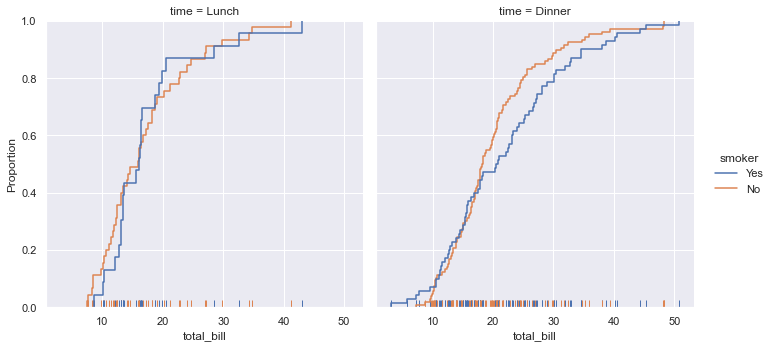

In [41]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

109. We can also generate plots that are geared toward categorical data.

110. A `swarm` plot is a scatterplot with adjusted point positions on the categorical axis to minimize overlap

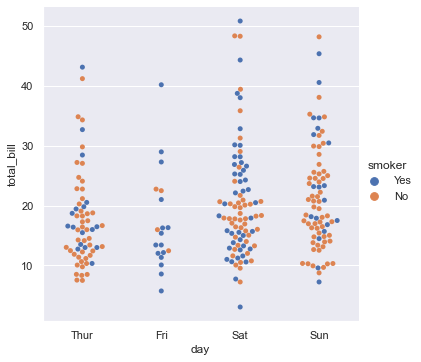

In [42]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

111. We could also display this categorical data using kernel density estimation and a violin plot.

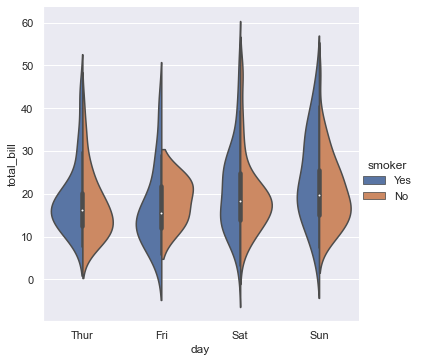

In [43]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

112. We could also display this data with a grouped bar chart that shows mean values and confidence intervals for each category.

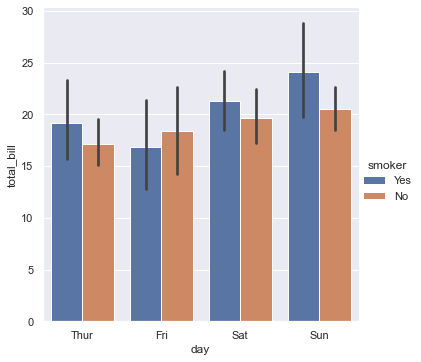

In [44]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

113. This is just a taste of how `seaborn` works to generate more advanced statistical plots.

114. Because the package integrates with `matplotlib`, customizing `seaborn` plots requires knowledge of `matplotlib` functionality and syntax.

115. Dropping down to the `matplotlib` layer is not always necessary (as shown in these examples), but a robust `matplotlib` foundation is knowledge that transfers when working with `seaborn`.

116. For more on `seaborn`:
- [`seaborn`, "seaborn: statistical data visualization"](http://seaborn.pydata.org/)
- [`seaborn`, "Installing and getting started"](https://seaborn.pydata.org/installing.html)
- [`seaborn`, "An introduction to seaborn"](http://seaborn.pydata.org/introduction.html)
- [`seaborn`, "User guide and tutorial"](http://seaborn.pydata.org/tutorial.html)
- [`seaborn`, "Example gallery"](https://seaborn.pydata.org/examples/index.html)
- [`seaborn`, "API reference"](https://seaborn.pydata.org/api.html)
- [Jake VanderPlas, "Visualization With Seaborn" from *Python Data Science Handbook*](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)

<blockquote>Q2: Build at least two different types of plots using seaborn and data stored in a Pandas DataFrame. Include code + comments.
 
Each plot should include the following elements:
 <ul>
  <li>Title</li>
  <li>Axis labels</li>
  <li>Legend</li>
  <li>Scale or tickmarks</li>
  <li>Data source</li>
 </ul>
 
Plot types to choose from:
 <ul>
 <li>Line plots</li>
 <li>Bar chart</li>
 <li>Grouped bar chart</li>
 <li>Horizontal bar chart</li>
 <li>Stacked bar chart</li>
 <li>Histogram</li>
 <li>Box plot</li>
 <li>Area plot</li>
 <li>Scatter plot</li>
 <li>Pie chart</li>
 </ul>
 </blockquote>

# Project Prompts

No problem prompts for this lab. Spend this time working on the final project.

# Lab Notebook Questions

Q1: Build at least three different types of plots using matplotlib and data stored in a Pandas DataFrame. Include code + comments. 

Each plot should include the following elements:
- Title
- Axis labels
- Legend
- Scale or tickmarks
- Data source
 
Plot types to choose from:
- Line plots
- Bar chart
- Grouped bar chart
- Horizontal bar chart
- Stacked bar chart
- Histogram
- Box plot
- Area plot
- Scatter plot
- Pie chart

Q2: Build at least two different types of plots using seaborn and data stored in a Pandas DataFrame. Include code + comments.

Each plot should include the following elements:
- Title
- Axis labels
- Legend
- Scale or tickmarks
- Data source
 
Plot types to choose from:
- Line plots
- Bar chart
- Grouped bar chart
- Horizontal bar chart
- Stacked bar chart
- Histogram
- Box plot
- Area plot
- Scatter plot
- Pie chart